# Team Gimbap


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#upload and clean the happiness data
df_happiness = pd.read_csv("./hapiness.csv", usecols=['Country', 'Happiness Score'])
df_happiness.head()

,Country,Happiness Score
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
3,Norway,7.522
4,Canada,7.427


In [3]:
#upload and clean the suicide data
df_suicide = pd.read_csv("./suicide.csv", usecols= ["Unnamed: 0","Unnamed: 1",
                "Age-standardized suicide rates (per 100 000 population).1"]).drop(0).rename(columns={"Unnamed: 0": "Country", 
                  "Unnamed: 1": "sex", "Age-standardized suicide rates (per 100 000 population).1": "Suicide rate per 10^5"})

df_suicide = df_suicide[df_suicide["sex"]=="Both sexes"].reset_index().drop(columns=['sex', 'index'])
df_suicide.head()

,Country,Suicide rate per 10^5
0,Afghanistan,6.6
1,Albania,5.3
2,Algeria,3.4
3,Angola,9.3
4,Antigua and Barbuda,0.8


## Erzeugung zusammengefügte Liste 

In [4]:
#merge two datasets directly -> only134 rows
dataframe_filtered = df_happiness.merge(df_suicide, on="Country", sort = True) 

print('Number of countries:', len(dataframe_filtered))
dataframe_filtered.head()

Number of countries: 134


,Country,Happiness Score,Suicide rate per 10^5
0,Afghanistan,3.575,6.6
1,Albania,4.959,5.3
2,Algeria,5.605,3.4
3,Angola,4.033,9.3
4,Argentina,6.574,8.7


## Liste aller Länder mit ihren ISO 3166-1 alpha-2 Codes

iso1.csv ist [List of all countries with their 2 digit codes (ISO 3166-1) ](https://datahub.io/core/country-list)

iso2.csv ist [Countries ISO Codes dataset](https://www.kaggle.com/juanumusic/countries-iso-codes)


iso3.csv ist [Countries of the World; ISO codes and population dataset](https://www.kaggle.com/erikbruin/countries-of-the-world-iso-codes-and-population?select=country_codes_2020.csv)  

iso4.csv ist [Countries dataset](https://www.kaggle.com/neerjad/countries)

In [10]:
#read all four csv-files with different countries' names and countries' unique codes
df_iso1= pd.read_csv("iso1.csv").rename(columns={'Name': 'Country'})

df_iso2 =pd.read_csv('iso2.csv', usecols= ['English short name lower case','Alpha-2 code']).rename(
    columns={'English short name lower case':'Country', 'Alpha-2 code': 'Code'})

df_iso3 = pd.read_csv('iso3.csv', usecols= ['name','cca2']).rename(
    columns={'name':'Country', 'cca2': 'Code'})

df_iso4 = pd.read_csv('iso4.csv', usecols= ['Country', 'ISO 3166 Country Code']).rename(
    columns={'ISO 3166 Country Code': 'Code'})

#delete rows with same country names
df_iso = pd.concat([df_iso1, df_iso2, df_iso3, df_iso4], sort=True, ignore_index=True).drop_duplicates(subset='Country').sort_values('Country').reset_index().drop(columns='index')

#result is a table with different spellings for a country name and its unique code, e.g. see rows 270 and 272
df_iso.tail(20)

,Code,Country
270,US,United States
271,UM,United States Minor Outlying Islands
272,US,United States Of America
273,VI,United States Virgin Islands
274,UY,Uruguay
275,UZ,Uzbekistan
276,VU,Vanuatu
277,VA,Vatican City
278,VE,Venezuela
279,VE,"Venezuela, Bolivarian Republic of"


In [11]:
#merge two datasets using ISO codes
dataframe_iso = df_iso.merge(df_happiness, on= 'Country')
dataframe_filtered = df_iso.merge(df_suicide, on = 'Country').merge(dataframe_iso,
                                    on= 'Code').drop_duplicates('Code').rename(columns={'Country_x':
                                        'Country'}).reindex(columns=['Country', 'Happiness Score','Suicide rate per 10^5'])
print('Number of countries:', len(dataframe_filtered))
dataframe_filtered.head()




Number of countries: 139


,Country,Happiness Score,Suicide rate per 10^5
0,Afghanistan,3.575,6.6
1,Albania,4.959,5.3
2,Algeria,5.605,3.4
3,Angola,4.033,9.3
4,Argentina,6.574,8.7


In [12]:
#test and verify data

for index, row in dataframe_filtered.iterrows():
    for i, r in df_happiness.iterrows():
        if row['Country'] == r['Country'] and row['Happiness Score'] != r['Happiness Score']:
            print("Fehler")
            break
        #elif row['Country'] == r['Country']:
            #print(index, row['Country'], r['Happiness Score'])
print('Happiness score getested')
            
for index, row in dataframe_filtered.iterrows():
    for i, r in df_suicide.iterrows():
        if row['Country'] == r['Country'] and row['Suicide rate per 10^5'] != r['Suicide rate per 10^5']:
            print("Fehler")
            break
        #elif row['Country'] == r['Country']:
            #print(index, row['Country'], r['Suicide rate per 10^5'])
print('Suicide rate getested')

Happiness score getested
Suicide rate getested


## Analyse


In [13]:
X = dataframe_filtered.iloc[:, 1:2].values #2D Array
y = dataframe_filtered.iloc[:, 2].values #1D Array

In [14]:
# Splitting the dataset into the training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

zipped_lists = zip(X_train, y_train)
sorted_pairs = sorted(zipped_lists)

tuples = zip(*sorted_pairs)
X_train, y_train = [ list(tuple) for tuple in  tuples]

zipped_lists1 = zip(X_test, y_test)
sorted_pairs1 = sorted(zipped_lists1)

tuples1 = zip(*sorted_pairs1)
X_test, y_test = [ list(tuple) for tuple in  tuples1]


## Regression models degree = 1, 2, 4

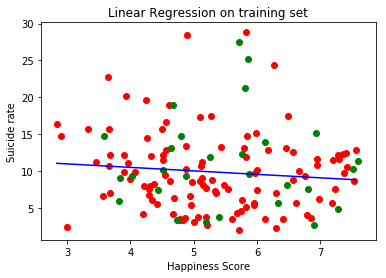

In [15]:
# Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X_train, y_train, color='red')
    plt.scatter(X_test, y_test, color='green')
    plt.plot(X_train, lin_reg.predict(X_train), color='blue')
    plt.title('Linear Regression on training set')
    plt.xlabel('Happiness Score')
    plt.ylabel('Suicide rate')
    plt.show()
    return

# Predicting suicide rates for test set with linear regression
lin = lin_reg.predict(X_test)
linX = lin_reg.predict(X)

viz_linear()

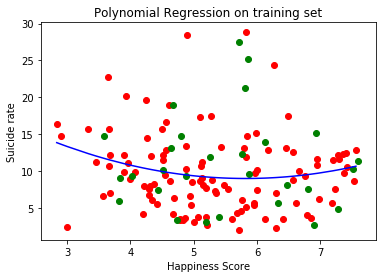

In [19]:
# Fitting Polynomial Regression to the dataset

poly_reg = PolynomialFeatures(degree=2)   
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

# Visualizing the Polymonial Regression results
def viz_polymonial(poly_reg):
    plt.scatter(X_train, y_train, color='red')
    plt.scatter(X_test, y_test, color='green')
    plt.plot(X_train, pol_reg.predict(poly_reg.fit_transform(X_train)), color='blue')
    plt.title('Polynomial Regression on training set')
    plt.xlabel('Happiness Score')
    plt.ylabel('Suicide rate')
    plt.show()
    return

# Predicting suicide rates for test set with polynomial regression degree 2
pol = pol_reg.predict(poly_reg.fit_transform(X_test))
polX = pol_reg.predict(poly_reg.fit_transform(X))

viz_polymonial(poly_reg)

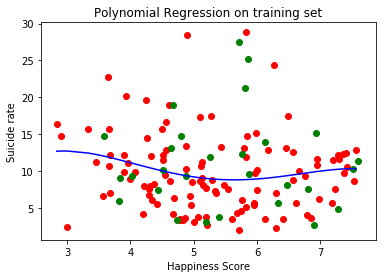

In [20]:
poly_reg_4 = PolynomialFeatures(degree=4)
X_poly_4 = poly_reg_4.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly_4, y_train)

# Predicting suicide rates for test set with polynomial regression degree 4
pol_4 = pol_reg.predict(poly_reg_4.fit_transform(X_test))
polX_4 = pol_reg.predict(poly_reg_4.fit_transform(X))

viz_polymonial(poly_reg_4)

## Prediction errors

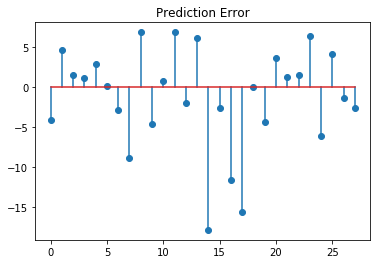

RMSE for linear regression: 6.373826326963088
R^2 Score for linear regression: -0.04823752656472391


In [24]:
numInstances=len(X_test);

Error=lin-y_test
plt.stem(np.arange(numInstances),Error)
plt.title('Prediction Error')
plt.show()

rmse_1 = np.sqrt(np.mean((lin-y_test)**2))
r2_1 = r2_score(y_test, lin)


# mean square error for linear regression prediction
print('RMSE for linear regression:', rmse_1)

# R^2 error for linear regression prediction
print('R^2 Score for linear regression:', r2_1)

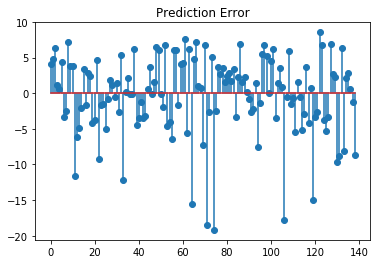

RMSE for linear regression: 5.508354165708032
R^2 Score for linear regression: 0.003519658409806059


In [25]:
numInstances=len(X);

Error=linX-y
plt.stem(np.arange(numInstances),Error)
plt.title('Prediction Error')
plt.show()

rmseX_1 = np.sqrt(np.mean((linX-y)**2))
r2X_1 = r2_score(y, linX)
# mean square error for linear regression prediction
print('RMSE for linear regression:', rmseX_1)

# R^2 error for linear regression prediction
print('R^2 Score for linear regression:',r2X_1)

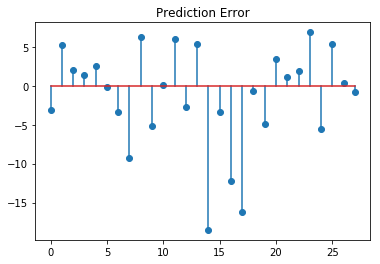

RMSE for polynomial regression degree 2: 6.5575348929494
R^2 Score for polynomial regression degree 2: -0.10953363490410006


In [26]:
numInstances=len(X_test);

Error=pol-y_test
plt.stem(np.arange(numInstances),Error)
plt.title('Prediction Error')
plt.show()

rmse_2 = np.sqrt(np.mean((pol-y_test)**2))
r2_2 = r2_score(y_test, pol)
# mean square error for Polynomial Regression prediction
print('RMSE for polynomial regression degree 2:', rmse_2)

# R^2 error for Polynomial Regression prediction
print('R^2 Score for polynomial regression degree 2:', r2_2)

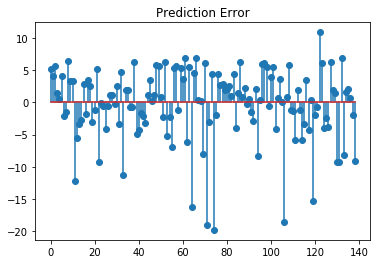

RMSE for polynomial regression degree 2: 5.502908916690903
R^2 Score for polynomial regression degree 2: 0.005488813433974005


In [27]:
numInstances=len(X);

Error=polX-y
plt.stem(np.arange(numInstances),Error)
plt.title('Prediction Error')
plt.show()

rmseX_2 = np.sqrt(np.mean((polX-y)**2))
r2X_2 = r2_score(y, polX)

# mean square error for Polynomial Regression prediction
print('RMSE for polynomial regression degree 2:',rmseX_2 )


# R^2 error for Polynomial Regression prediction
print('R^2 Score for polynomial regression degree 2:', r2X_2)

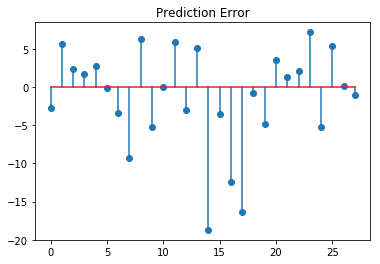

RMSE for for polynomial regression degree 4: 6.619873297780741
R^2 Score for polynomial regression degree 4: -0.13072919688139284


In [28]:
numInstances=len(X_test);

Error=pol_4-y_test
plt.stem(np.arange(numInstances),Error)
plt.title('Prediction Error')
plt.show()

rmse_4 = np.sqrt(np.mean((pol_4-y_test)**2))
r2_4 = r2_score(y_test, pol_4)
# mean square error for Polynomial Regression prediction
print('RMSE for for polynomial regression degree 4:', rmse_4)

# R^2 error for Polynomial Regression prediction
print('R^2 Score for polynomial regression degree 4:',r2_4)

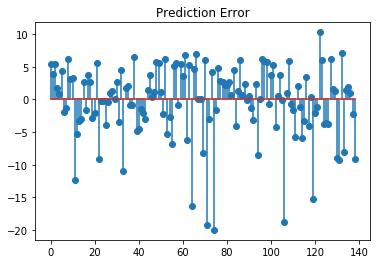

RMSE for polynomial regression degree 4: 5.513674216543723
R^2 Score for polynomial regression degree 4: 0.00159389766005269


In [29]:
numInstances=len(X);

Error=polX_4-y
plt.stem(np.arange(numInstances),Error)
plt.title('Prediction Error')
plt.show()

rmseX_4 = np.sqrt(np.mean((polX_4-y)**2))
r2X_4 = r2_score(y, polX_4)
# mean square error for Polynomial Regression prediction
print('RMSE for polynomial regression degree 4:', rmseX_4)


# R^2 error for Polynomial Regression prediction
print('R^2 Score for polynomial regression degree 4:', r2X_4) 

In [30]:
# Correlation Coefficient 
print(dataframe_filtered.corr())

                       Happiness Score  Suicide rate per 10^5
Happiness Score               1.000000              -0.079243
Suicide rate per 10^5        -0.079243               1.000000


In [31]:
# Error table
df_error = pd.DataFrame(np.array( [['RMSE lineare regression', rmse_1,rmseX_1],['RMSE polyn.Regression Grad 2', rmse_2, rmseX_2],['RMSE polyn.Regression Grad 4', rmse_4,rmseX_4],
                                         ['R2 lineare regression', r2_1,r2X_1],['R2 polyn.Regression Grad 2', r2_2,r2X_2],['R2 polyn.Regression Grad 4', r2_4,r2X_4]]), columns=['Error', 'X_test', 'X'])
df_error

,Error,X_test,X
0,RMSE lineare regression,6.373826326963088,5.508354165708032
1,RMSE polyn.Regression Grad 2,6.5575348929494,5.502908916690903
2,RMSE polyn.Regression Grad 4,6.619873297780741,5.513674216543723
3,R2 lineare regression,-0.04823752656472391,0.003519658409806059
4,R2 polyn.Regression Grad 2,-0.10953363490410006,0.005488813433974005
5,R2 polyn.Regression Grad 4,-0.13072919688139284,0.00159389766005269
